In [119]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [149]:
col_dirs = os.listdir('Collisions/')
print(col_dirs)

list_of_df = []
for col_run in col_dirs:
    list_of_df.append(pd.read_csv('Collisions/'+col_run+'/'+col_run+'_final.csv'))
    
df = pd.concat(list_of_df)


['322179', '324293', '324970', '321475', '321305', '324878', '324980', '320917', '322022', '321457']


In [150]:
df['occupancy/LS'] = df['occupancy'] / df['lumisections']
df = df.reset_index(drop=True)
df.describe()

,run,wheel,sector,station,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,avg_efficiency,fid_eff_ch_level,occupancy/LS
count,4800.000000,4800.000000,4800.000000,4800.00000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,322847.600000,0.000000,6.375000,2.50000,1.673960,68427.510000,0.014411,0.924995,1.678632,2082.400000,72.496590,84.535001,33.170298
std,1622.410928,1.414361,3.428944,1.11815,0.787791,44223.414585,0.032876,0.268139,0.789199,277.115208,25.873550,26.613226,21.518268
min,320917.000000,-2.000000,1.000000,1.00000,0.000000,0.000000,-0.076679,0.000000,0.000000,1788.000000,0.000000,0.000000,0.000000
25%,321457.000000,-1.000000,3.750000,1.75000,1.528345,35231.750000,0.004199,1.001030,1.532345,1813.000000,61.367342,86.791766,17.041752
50%,322100.500000,0.000000,6.000000,2.50000,1.779250,55400.500000,0.006051,1.002130,1.783255,2008.000000,82.559149,95.156996,26.952179
75%,324878.000000,1.000000,9.000000,3.25000,1.976788,99431.000000,0.009547,1.003900,1.983387,2325.000000,89.392509,97.492885,48.459936
max,324980.000000,2.000000,12.000000,4.00000,41.000000,219511.000000,1.000000,1.006760,41.000000,2649.000000,96.429314,100.000000,110.364094


# All Runs together

### 1D histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa0da78240>,
      dtype=object)

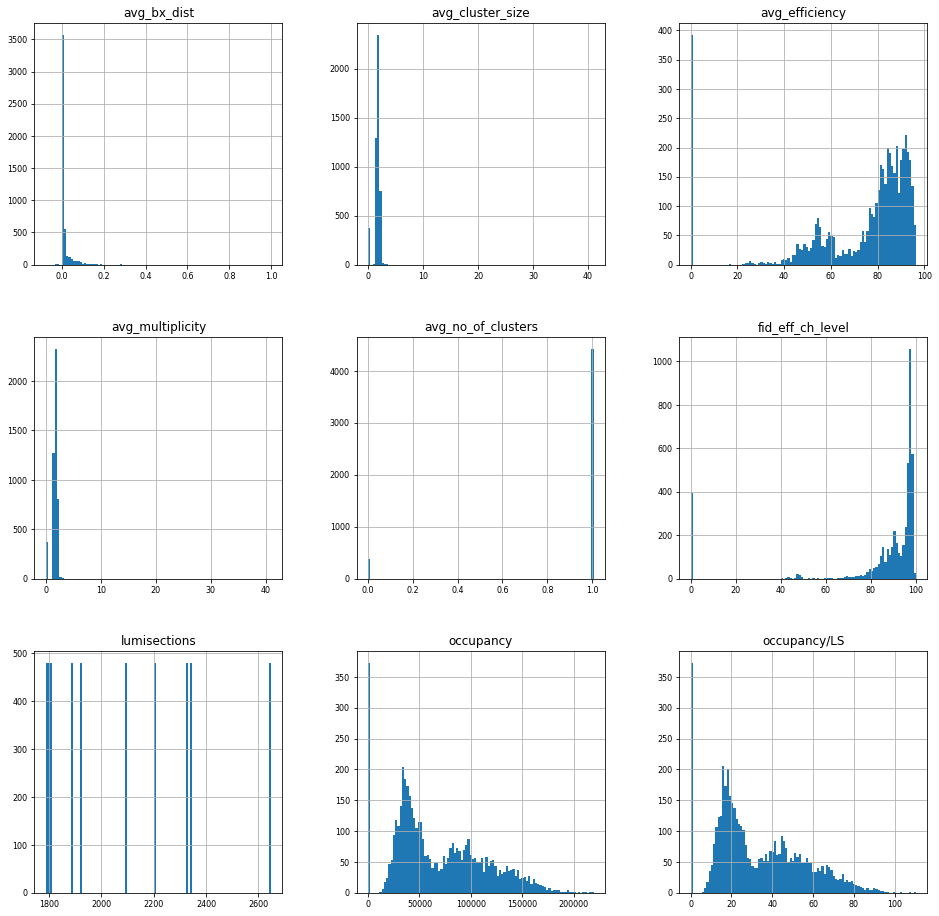

In [151]:
df_hist = df
df_hist = df_hist.drop(['run', 'chamber', 'wheel', 'sector', 'station', 'type'], axis=1)
df_hist.hist(figsize=(16, 16), bins=100, xlabelsize=8, ylabelsize=8)

In [123]:
df[df['avg_multiplicity'] >= 4]

,run,chamber,wheel,sector,station,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,type,avg_efficiency,fid_eff_ch_level,occupancy/LS
2549,324878,W-1_RB2out_S07,-1,7,2,41.0,41,1.0,1.0,41.0,1800,Col,0.0,0.0,0.022778


In [124]:
#droping the row with avg_multiplicity 41 (outlier)
i = df[df['avg_multiplicity'] >= 4].index
df = df.drop(i)
df.shape[0]

4799

In [125]:
print(df[ (df['occupancy'] == 0) & (df['fid_eff_ch_level'] == 0)].shape[0])
print(df[ (df['occupancy'] != 0) & (df['fid_eff_ch_level'] == 0)].shape[0])

372
20


In [126]:
# droping the rows with fid eff = 0
i = df[df['fid_eff_ch_level'] == 0].index
df = df.drop(i)
df.shape[0]

4407

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa6c70ecc0>,
      dtype=object)

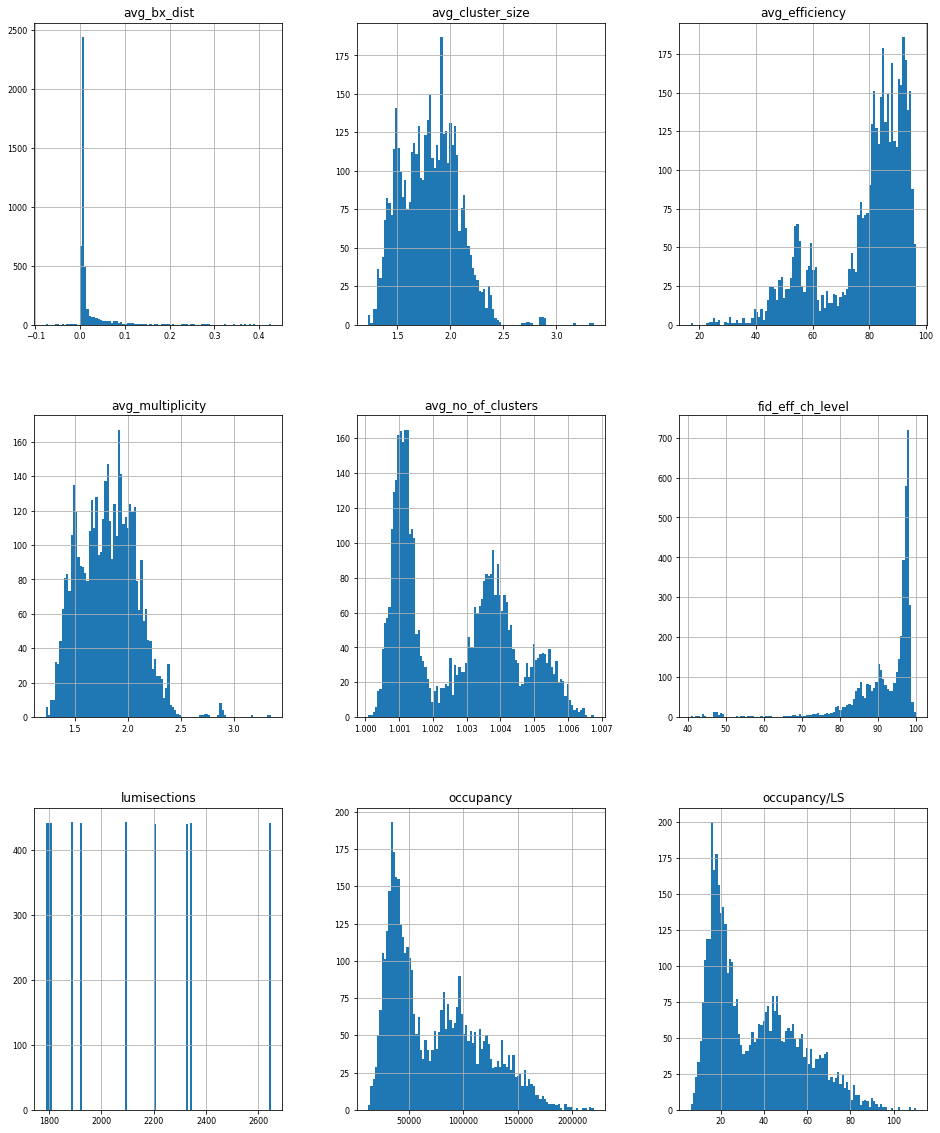

In [127]:
# from the lumisction histogram it can be concluded that number 
# of zero fid-eff chambers are almost the same for each run.
df_hist = df
df_hist = df_hist.drop(['run', 'chamber', 'wheel', 'sector', 'station', 'type'], axis=1)
df_hist.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8)

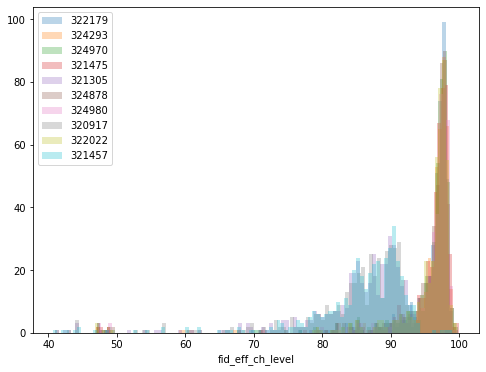

In [128]:
# checking the origin of picks in 'fid_eff_ch_level' and find out if they are 
# related to separate Runs.
df_pick = df[['fid_eff_ch_level', 'run']]
plt.figure(figsize=(8, 6))
for col_run in col_dirs:
    n = int(col_run)
    df_pick_s = df_pick[df_pick['run'] == n]
    plt.hist(df_pick_s['fid_eff_ch_level'], bins = 100, alpha=0.3, label= col_run)

plt.xlabel('fid_eff_ch_level')
plt.legend(loc='upper left')
plt.show()

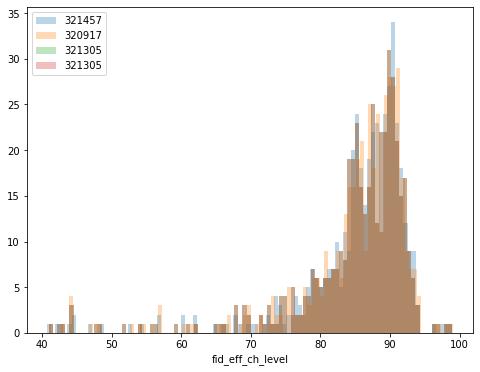

In [129]:
# it seems that for run numbers ['321457' ,'320917', '321305','321305' ] 
# the fid_eff distribution is different. 
df_pick = df[['fid_eff_ch_level', 'run']]
col_dirs2 = ['321457' ,'320917', '321305','321305' ]
plt.figure(figsize=(8, 6))
for col_run in col_dirs2:
    n = int(col_run)
    df_pick_s = df_pick[df_pick['run'] == n]
    plt.hist(df_pick_s['fid_eff_ch_level'], bins = 100, alpha=0.3, label= col_run)

plt.xlabel('fid_eff_ch_level')
plt.legend(loc='upper left')
plt.show()

### 2D histograms

In [130]:
df_hist.describe()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,lumisections,avg_efficiency,fid_eff_ch_level,occupancy/LS
count,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,1.805573,74182.229862,0.015359,1.002704,1.810636,2082.255503,78.961568,92.073521,35.959929
std,0.266016,41227.226430,0.030589,0.001633,0.268026,277.135408,14.783494,8.785382,20.079098
min,1.226550,12800.000000,-0.076679,1.000080,1.227240,1788.000000,17.021276,40.718914,6.050208
25%,1.590645,38554.000000,0.004609,1.001140,1.596385,1813.000000,73.627853,89.226130,18.661108
50%,1.806780,62489.000000,0.006345,1.002730,1.810930,1925.000000,83.929014,95.950329,30.332215
75%,1.995840,103440.000000,0.010078,1.003970,2.002570,2325.000000,90.075052,97.580486,50.386009
max,3.349460,219511.000000,0.427211,1.006760,3.352250,2649.000000,96.429314,100.000000,110.364094


In [135]:
# correlation of different variables
# avg_multiplicity and avg_cluster_size are the highest correlated ones
# fid_eff_ch_level is mostly correlated with avg_cluster_size
df_hist = df_hist.drop(['lumisections'], axis=1)
df_hist.corr()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,avg_efficiency,fid_eff_ch_level,occupancy/LS
avg_cluster_size,1.000000,0.582994,-0.040385,0.414710,0.999946,0.181597,0.474706,0.601917
occupancy,0.582994,1.000000,-0.032541,0.896667,0.590457,0.124447,0.216815,0.966757
avg_bx_dist,-0.040385,-0.032541,1.000000,-0.000452,-0.040248,-0.043929,-0.051747,-0.035889
avg_no_of_clusters,0.414710,0.896667,-0.000452,1.000000,0.423998,-0.084976,0.045175,0.897231
avg_multiplicity,0.999946,0.590457,-0.040248,0.423998,1.000000,0.179802,0.473020,0.609316
avg_efficiency,0.181597,0.124447,-0.043929,-0.084976,0.179802,1.000000,0.546982,0.129321
fid_eff_ch_level,0.474706,0.216815,-0.051747,0.045175,0.473020,0.546982,1.000000,0.232791
occupancy/LS,0.601917,0.966757,-0.035889,0.897231,0.609316,0.129321,0.232791,1.000000


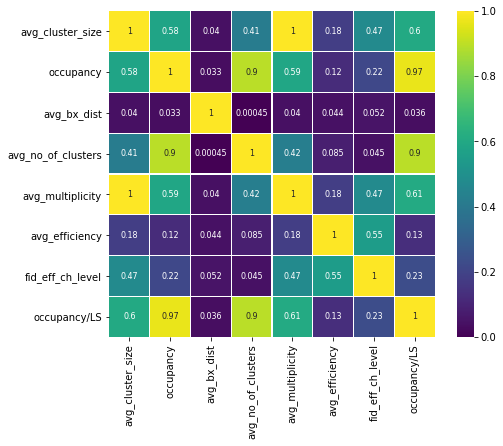

In [148]:
plt.figure(figsize=(8, 6))
sns.heatmap(abs(df_hist.corr()), 
            cmap='viridis', vmax=1.0, vmin=0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

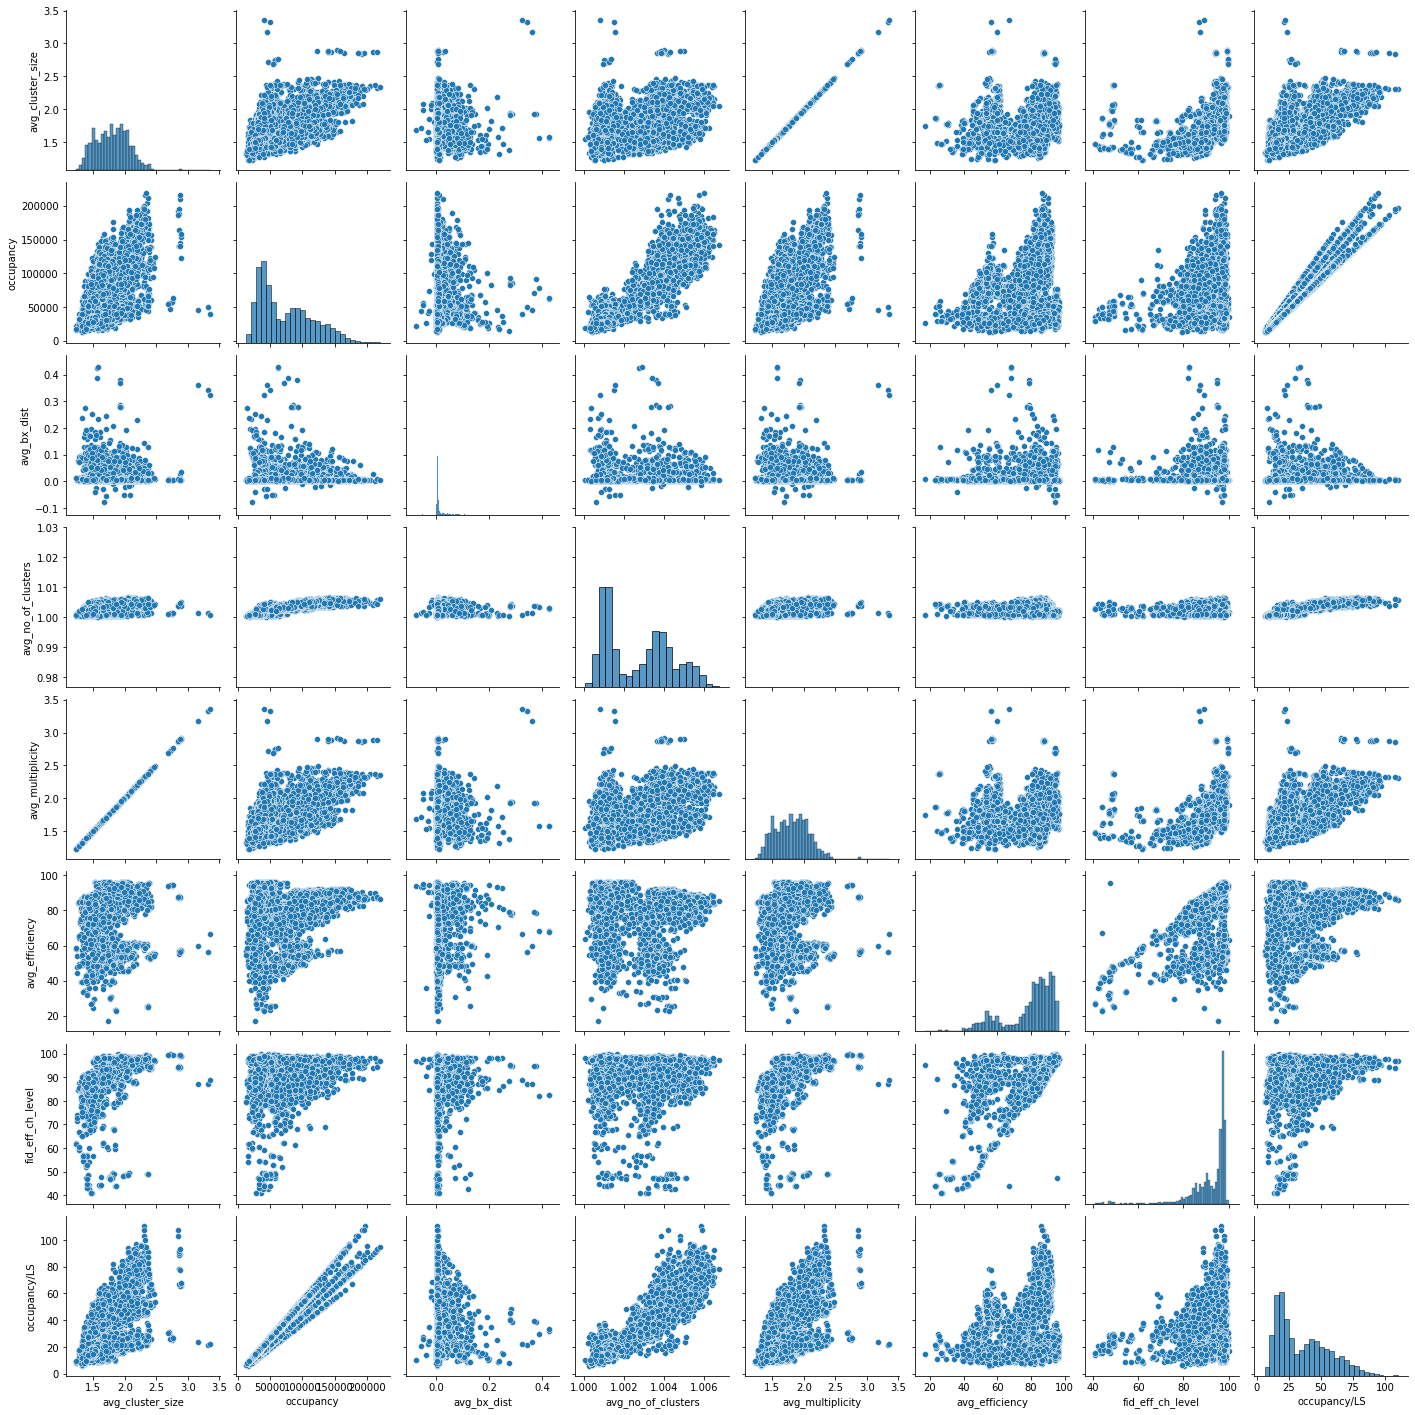

In [15]:
sns.pairplot(df_hist)

#### spliting by fid_eff

In [13]:
# checking the 2d histograms after spliting the data into 
# two parts: A-fid_eff > 80 and B-fid_eff <80
print(len(df_hist))
print(df_hist[df_hist['fid_eff_ch_level'] >= 80].shape[0])

4407
4114


In [98]:
c = []
df_hist = df_hist.reset_index(drop=True)
for i in range(len(df_hist)):
    if df_hist['fid_eff_ch_level'][i] >= 80:
        c.append('high')
    else:
        c.append('low')
df_hist = df_hist.assign( eff_cl = c)
df_hist.head()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,avg_efficiency,fid_eff_ch_level,occupancy/LS,run_label,eff_cl
0,1.88807,87935,0.007343,1.00403,1.89568,52.477024,96.665222,49.180649,B,high
1,1.84406,78345,0.008426,1.00371,1.85090,57.869761,97.633621,43.817114,B,high
2,2.00793,93656,0.007247,1.00405,2.01606,79.958797,98.162010,52.380313,B,high
3,1.86217,80453,0.013540,1.00344,1.86857,83.298027,98.551542,44.996085,B,high
4,1.84129,37288,0.004345,1.00104,1.84320,91.871521,98.427452,20.854586,B,high


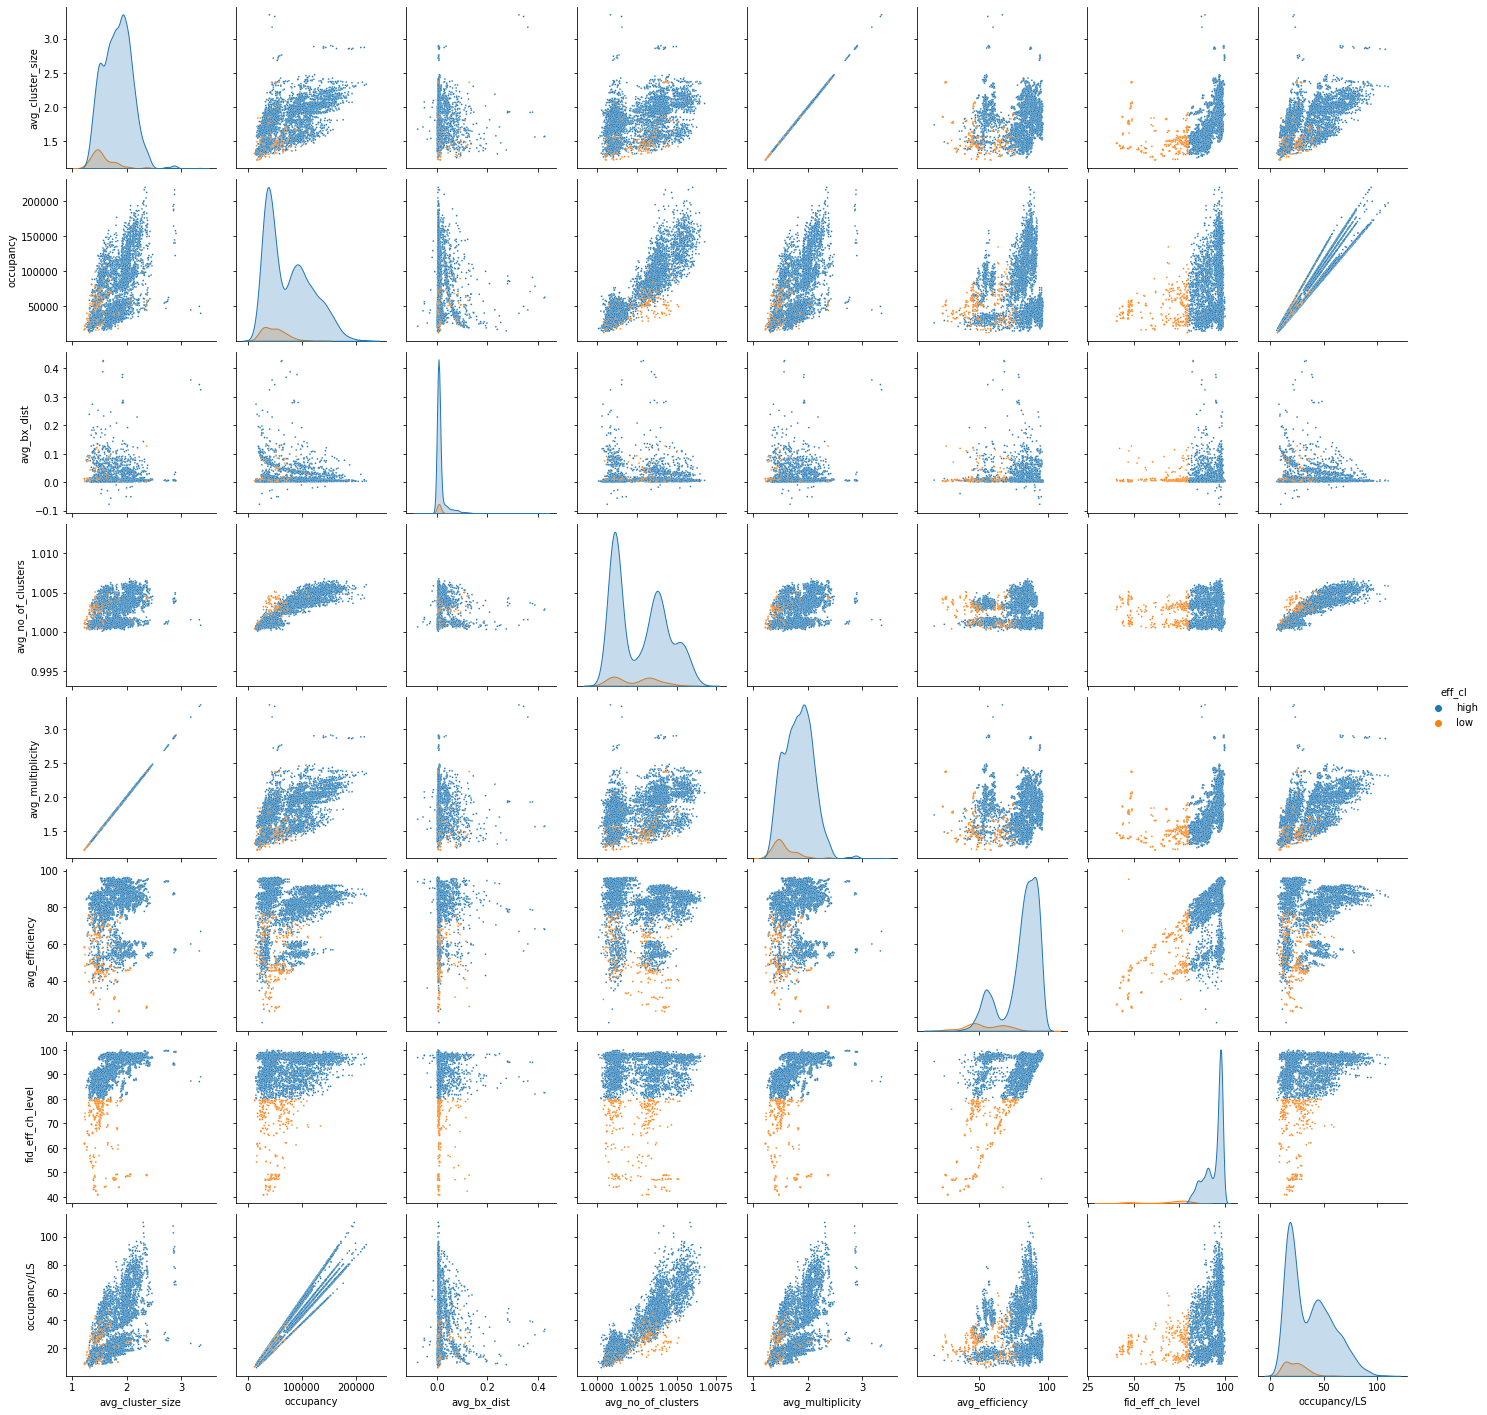

In [105]:
# orange markers are data with fid_eff_ch_level < 80
# blue markers are data with fid_eff_ch_level >= 80
sns.pairplot(df_hist, hue='eff_cl',  plot_kws={"s": 3})

#### spliting by run number

In [95]:
# checking how the 2d histograms differ if we split the data in to two parts by 
# Run numbers which has different fid_eff distribution as shown in 1d histogram section:
# A: [321457 ,320917, 321305, 321305] and B: else
df_hist = df
df_hist = df_hist.drop(['lumisections', 'chamber', 'wheel', 'sector', 'station', 'type'], axis=1)
run_list = np.array([321457 ,320917, 321305, 321305])
label = []
df_hist = df_hist.reset_index(drop=True)
for i in range(len(df_hist)):
    if df_hist['run'][i] in run_list:
        label.append('A')
    else:
        label.append('B')
df_hist = df_hist.assign( run_label = label)
df_hist = df_hist.drop(['run'], axis=1)
df_hist.head()

,avg_cluster_size,occupancy,avg_bx_dist,avg_no_of_clusters,avg_multiplicity,avg_efficiency,fid_eff_ch_level,occupancy/LS,run_label
0,1.88807,87935,0.007343,1.00403,1.89568,52.477024,96.665222,49.180649,B
1,1.84406,78345,0.008426,1.00371,1.85090,57.869761,97.633621,43.817114,B
2,2.00793,93656,0.007247,1.00405,2.01606,79.958797,98.162010,52.380313,B
3,1.86217,80453,0.013540,1.00344,1.86857,83.298027,98.551542,44.996085,B
4,1.84129,37288,0.004345,1.00104,1.84320,91.871521,98.427452,20.854586,B
